In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
import pandas as pd

# renkodf
### Transform Tick Data into OHLCV Renko Dataframe!
![SegmentLocal](readme_files/renkodf_anim.gif "segment")

-----

# Installation
## &nbsp;&nbsp;&nbsp;`pip install renkodf`
### or just copy *renkodf.py* file to your project!
   - renkodf requires [pandas](https://pypi.org/project/pandas/), [numpy](https://pypi.org/project/numpy/) and [mplfinance](https://pypi.org/project/mplfinance/)

---

# Content
  - **[Usage](#usage)**
  - **[Animation/Realtime Renko Chart](#anim)**
  - **[Is the Renko chart calculated correctly?](#calculated)**

---

# <a name="usage"></a>Usage

There are two classes available:
* `Renko(df, brick_size, add_columns)`
<br>To create Renko OHLCV dataframe with existing Ticks data.
* `RenkoWS(timestamp, price, brick_size, external_df, external_mode)`
<br>To create real-time Renko charts, usually over a **WebSocket** connection.

Let's start with the first class, load a Pandas DataFrame containing Ticks Data, for example:

In [2]:
import pandas as pd
df_ticks = pd.read_parquet('examples/data/EURGBP_T1_cT.parquet')
df_ticks.rename(columns={'bid': 'close'}, inplace=True)
df_ticks.head(3)
df_ticks.tail(3)

,ask,close,spread
datetime,,,
2023-06-23 00:00:00.335,0.85950,0.85945,0.00005
2023-06-23 00:00:00.541,0.85951,0.85944,0.00007
2023-06-23 00:00:02.106,0.85950,0.85944,0.00006


,ask,close,spread
datetime,,,
2023-06-27 23:59:56.612,0.85976,0.85969,0.00007
2023-06-27 23:59:57.175,0.85975,0.85969,0.00006
2023-06-27 23:59:59.053,0.85974,0.85969,0.00005


---
Only two columns are required:
   * `close`: Mandatory.
   * `datetime`: If is not present, the index will be used.
<br>You can add other columns if you want, just put a list with their names in the `add_columns` parameter.
       
After importing renkodf and setting `brick_size`, just call `renko_df()` with the chosen mode name.<br> 
**See all available modes in [renkodf_modes.ipynb](./examples/renkodf_modes.ipynb)**

In [3]:
from renkodf import Renko
r = Renko(df_ticks, brick_size=0.0003)
df = r.renko_df('normal') # 'wicks' = default 
df.head(3)
df.tail(3)

 100.0%

,open,high,low,close,volume
datetime,,,,,
2023-06-23 01:21:58.333,0.8595,0.8598,0.8595,0.8598,3458.0
2023-06-23 01:33:24.996,0.8598,0.8601,0.8598,0.8601,571.0
2023-06-23 03:18:30.345,0.8601,0.8604,0.8601,0.8604,4993.0


,open,high,low,close,volume
datetime,,,,,
2023-06-27 17:29:15.119,0.8595,0.8598,0.8595,0.8598,2889.0
2023-06-27 21:01:00.071,0.8595,0.8595,0.8592,0.8592,7779.0
2023-06-27 21:31:48.569,0.8595,0.8598,0.8595,0.8598,359.0


You can use `mpf.plot()` or `r.plot()`, as in the example below.

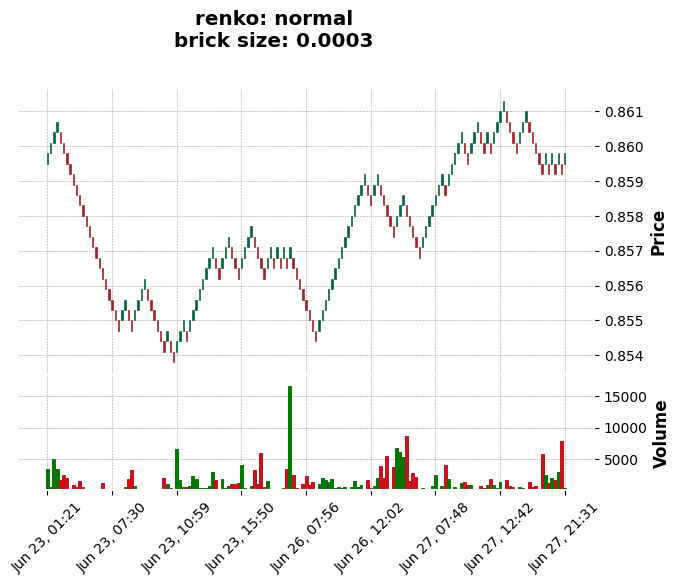

In [32]:
import mplfinance as mpf
mpf.plot(df, type='candle', volume=True, style="charles", 
         title=f"renko: normal\nbrick size: 0.0003")
mpf.show()
# same as:
# r.plot('normal')

As described in [renkodf_modes.ipynb](./examples/renkodf_modes.ipynb), we can have multiple dataframes of different modes from the same instance.

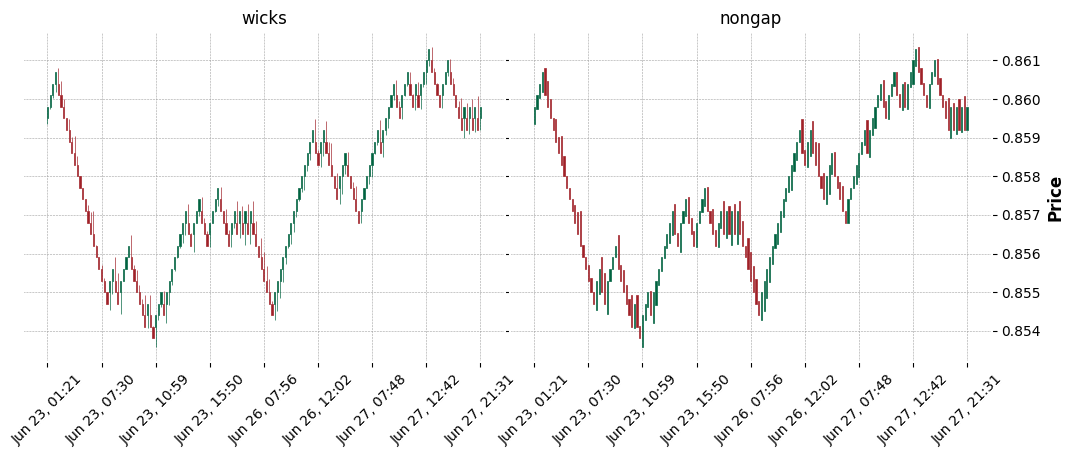

In [27]:
df_wicks = r.renko_df('wicks')
df_nongap = r.renko_df('nongap')

fig = mpf.figure(style='charles', figsize=(12.5,9))
fig.subplots_adjust(hspace=0.1, wspace=0.01)
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

mpf.plot(df_wicks,type='candle',ax=ax1,axtitle='wicks', )
mpf.plot(df_nongap,type='candle',ax=ax2,axtitle='nongap')
mpf.show()

# <a name="anim"></a>Animation/Real-time Renko Chart
Following the steps of the mplfinance documentation, it can be tricky to display animations properly in jupyter notebooks, therefore, to keep things simple, the animation examples are scripts.

To run the animation examples, clone this repository, then into the `renkodf/examples` folder, run:
 * python ws_animchart_demo.py 
 * python ws_multichart_demo.py
 * python ws_externaldf_demo.py

**NOTE:** There are comments, in each of the above example files, talking about situations or recommendations to be applied in real cases.

# <a name="calculated"></a>Is the Renko chart calculated correctly?
I also asked myself the same question, how about we see for ourselves? <br>
We are going to do this based on *Spotware's FX/CFD Trading Platform* called **cTrader**,<br>
using *IC Markets* as a Price Provider. 
#### **[Let's go!](./examples/comparison_ctrader.ipynb)**

**RESUME**: Despite the possible occurrence of more/less bricks, the renko calculation used is practically the same, or very approximate.

### Non-Affiliation Disclaimer
I'm not endorsed by, directly affiliated with, maintained, authorized, or sponsored by any company previously mentioned. 
All product and company names are the registered trademarks of their original owners. 
The use of any trade name or trademark is for identification and reference purposes only and does not imply any association with the trademark holder of their product brand.